<a href="https://colab.research.google.com/github/Brandon2589/DMPLearning2022/blob/main/DMP_Learning2022_Brandon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Gspread to import Google Sheets

In [129]:
## install gspread to download Google sheets
!pip install --upgrade gspread


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
#import data from Google drive
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

workbook = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IfYeYtcp1xX4JkInVZSf8fU7FP3eFcrspbDwnasHEKg/edit#gid=1746523826')
ws = workbook.worksheet('World Energy Consumption')

# get_all_values gives a list of rows.
rows = ws.get_all_values()


# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)
#set column names equal to values in row index position 0
df.columns = df.iloc[0]
#remove first row from DataFrame
df = df[1:]
print(df.head(10))

0  iso_code      country  year coal_prod_change_pct coal_prod_change_twh  \
1       AFG  Afghanistan  1900                                             
2       AFG  Afghanistan  1901                                         0   
3       AFG  Afghanistan  1902                                         0   
4       AFG  Afghanistan  1903                                         0   
5       AFG  Afghanistan  1904                                         0   
6       AFG  Afghanistan  1905                                         0   
7       AFG  Afghanistan  1906                                         0   
8       AFG  Afghanistan  1907                                         0   
9       AFG  Afghanistan  1908                                         0   
10      AFG  Afghanistan  1909                                         0   

0  gas_prod_change_pct gas_prod_change_twh oil_prod_change_pct  \
1                                                                
2                              

In [131]:
## describe dataframe shape
df.shape

(17432, 122)

In [132]:
#display 500 rows max
pd.set_option('display.max_rows', 500)

Create dataframe Energy consumption by country an year

In [133]:
Energy_comsumption_by_country_year = df.loc[:,df.columns.str.contains('year|consumption|country')]
display(Energy_comsumption_by_country_year)

,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
1,Afghanistan,1900,,,,,,,,,,,,,
2,Afghanistan,1901,,,,,,,,,,,,,
3,Afghanistan,1902,,,,,,,,,,,,,
4,Afghanistan,1903,,,,,,,,,,,,,
5,Afghanistan,1904,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17428,Zimbabwe,2015,0,,,,,,,,,55.642,,,
17429,Zimbabwe,2016,0,,,,,,,,,47.5,,,
17430,Zimbabwe,2017,0,,,,,,,,,,,,
17431,Zimbabwe,2018,0,,,,,,,,,,,,


Energy_comsumption_by_country_year=Energy_comsumption_by_country_year.mask(df == '')
# Repalce blanks with Nan

In [134]:
Energy_consumption_by_country_year =Energy_comsumption_by_country_year.mask(Energy_comsumption_by_country_year == '')

##Repalce blanks with Nan



In [135]:
# drop all rows where all fields are NaN
Energy_consumption_by_country_year.dropna(how='all',axis=0,inplace=True)

#drop all columns where all cells are Nan
Energy_comsumption_by_country_year.dropna(how='all',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [136]:
#Transform strings to numeric data types
Energy_consumption_by_country_year[["biofuel_consumption","coal_consumption","fossil_fuel_consumption","gas_consumption","hydro_consumption","low_carbon_consumption","nuclear_consumption","oil_consumption","other_renewable_consumption","primary_energy_consumption","renewables_consumption", "solar_consumption","wind_consumption" ]] = Energy_consumption_by_country_year[["biofuel_consumption","coal_consumption","fossil_fuel_consumption","gas_consumption","hydro_consumption","low_carbon_consumption","nuclear_consumption","oil_consumption","other_renewable_consumption","primary_energy_consumption","renewables_consumption", "solar_consumption","wind_consumption" ]].apply(pd.to_numeric)
Energy_consumption_by_country_year.dtypes

0
country                         object
year                            object
biofuel_consumption            float64
coal_consumption               float64
fossil_fuel_consumption        float64
gas_consumption                float64
hydro_consumption              float64
low_carbon_consumption         float64
nuclear_consumption            float64
oil_consumption                float64
other_renewable_consumption    float64
primary_energy_consumption     float64
renewables_consumption         float64
solar_consumption              float64
wind_consumption               float64
dtype: object

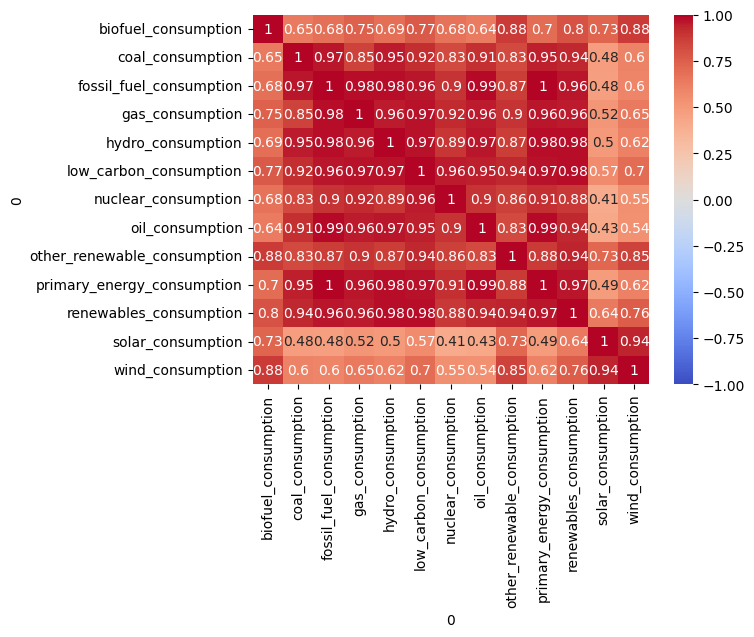

In [137]:
#import matplotlib and seaborn
import matplotlib.pyplot as mp

import seaborn as sb
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot

Energy_consumption_by_country_year.corr()
  
sb.heatmap(Energy_consumption_by_country_year.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [138]:
import logging, sys

logging.basicConfig(
    format="%(asctime)s.%(msecs)03dZ - %(levelname)s - %(name)s - %(message)s",
    datefmt="%Y-%m-%dT%H:%M:%S",
    level=logging.INFO,
    stream=sys.stdout
)

logger = logging.getLogger(__name__)

logging.getLogger('botocore').setLevel(logging.INFO)
logging.getLogger('fsspec').setLevel(logging.DEBUG)

In [139]:
from tempfile import mkdtemp
from urllib.request import urlretrieve

tmp_dir = mkdtemp()

# Upload Countries Basic Fields
countries_basic_csv_path = f"{tmp_dir}/Countries_Basic_Fields.csv"
urlretrieve("https://github.com/amycelliott/DMP_LP_2022/blob/main/files/Countries_Basic_Fields.csv?raw=true", countries_basic_csv_path)
logger.info(f"Downloaded sample CSV file to {countries_basic_csv_path}")

In [140]:
import numpy as np

df_country_basic = pd.read_csv(
    countries_basic_csv_path, 
    # if your dataset doesn't have column names in the first row, you need to specify them like this
    #header=0, names=["iso_code","country", "year", "energy_per_gdp", "energy_per_capita", "per_capita_electricity", "population", "primary_energy_consumption", "gdp"]
)

df_country_basic.info()

# after loading, we can explore the data in all different ways pandas support
# No need to do this yet
df_country_basic = df_country_basic.sort_values('year', ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15630 entries, 0 to 15629
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    15630 non-null  object 
 1   country                     15630 non-null  object 
 2   year                        15630 non-null  int64  
 3   energy_per_gdp              6887 non-null   float64
 4   energy_per_capita           8833 non-null   float64
 5   per_capita_electricity      5374 non-null   float64
 6   population                  15411 non-null  float64
 7   primary_energy_consumption  8916 non-null   float64
 8   gdp                         10366 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.1+ MB


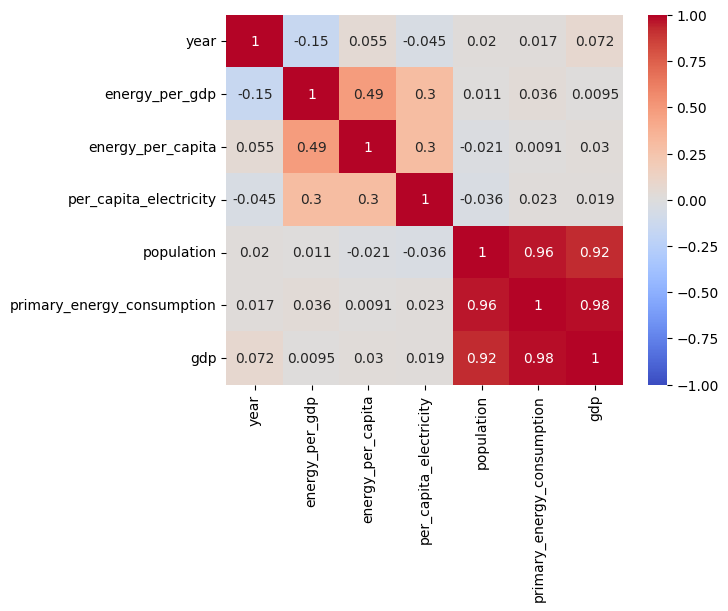

In [141]:
#examine Correlation of country data using heat map
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot

df_country_basic.corr()
  
sb.heatmap(df_country_basic.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')


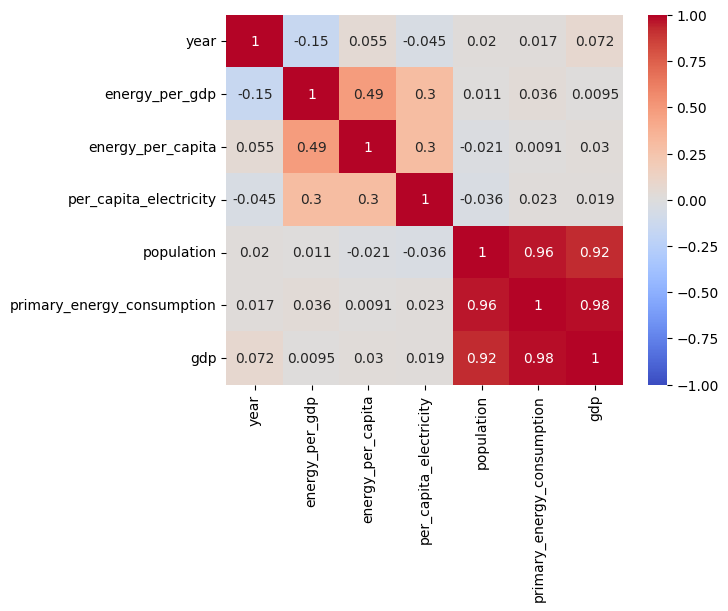

In [142]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot

df_country_basic.corr()
  
sb.heatmap(df_country_basic.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

Group by Year

In [143]:
Energy_consumption_by_country_year_group = Energy_consumption_by_country_year.groupby(['year']).sum().reset_index()
Energy_consumption_by_country_year_group.dtypes


0
year                            object
biofuel_consumption            float64
coal_consumption               float64
fossil_fuel_consumption        float64
gas_consumption                float64
hydro_consumption              float64
low_carbon_consumption         float64
nuclear_consumption            float64
oil_consumption                float64
other_renewable_consumption    float64
primary_energy_consumption     float64
renewables_consumption         float64
solar_consumption              float64
wind_consumption               float64
dtype: object

In [144]:
Energy_consumption_by_country_year_group.head(5)

,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
0,1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Group by country

In [145]:
Energy_consumption_groupby_country = Energy_consumption_by_country_year.groupby(['country']).sum().reset_index()
Energy_consumption_groupby_country.dtypes

0
country                         object
biofuel_consumption            float64
coal_consumption               float64
fossil_fuel_consumption        float64
gas_consumption                float64
hydro_consumption              float64
low_carbon_consumption         float64
nuclear_consumption            float64
oil_consumption                float64
other_renewable_consumption    float64
primary_energy_consumption     float64
renewables_consumption         float64
solar_consumption              float64
wind_consumption               float64
dtype: object

In [146]:
from datetime import datetime
con=Energy_consumption_by_country_year_group['year']
Energy_consumption_by_country_year_group['year']=pd.to_datetime(Energy_consumption_by_country_year_group['year'])
Energy_consumption_by_country_year_group.set_index('year', inplace=True)
#check datatype of index
Energy_consumption_by_country_year_group.index

DatetimeIndex(['1900-01-01', '1901-01-01', '1902-01-01', '1903-01-01',
               '1904-01-01', '1905-01-01', '1906-01-01', '1907-01-01',
               '1908-01-01', '1909-01-01',
               ...
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='year', length=121, freq=None)

Pie chart comparing Top 3 Energy Users vs World

In [147]:
# filter dataframe
US_China = ['China','United States','Canada','World']
US_China_cons = Energy_consumption_by_country_year.loc[Energy_consumption_by_country_year['country'].isin(US_China)]
World_cons = Energy_consumption_by_country_year[Energy_consumption_by_country_year['country'] == 'World']

In [148]:
China_US_energy_cons_2000 = US_China_cons[US_China_cons['year'].str.contains("2000")]
China_US_energy_cons_2019 = US_China_cons[US_China_cons['year'].str.contains("2019")]

display(China_US_energy_cons_2000)
display(China_US_energy_cons_2019)


,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
2992,Canada,2000,0.000,355.736,2340.522,892.208,991.001,1217.365,200.816,1092.578,24.770,3557.887,1016.550,0.046,0.733
3446,China,2000,0.000,8211.413,11119.510,246.958,617.806,673.045,46.492,2661.139,7.047,11792.554,626.553,0.061,1.639
16350,United States,2000,39.074,6286.541,23224.264,6283.912,757.671,3203.199,2204.367,10653.812,184.952,26427.463,998.832,1.440,15.694
17005,World,2000,126.039,27417.313,94314.391,23999.887,7366.566,15268.987,7169.170,42897.191,516.820,109583.378,8099.817,3.112,87.280


,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
3011,Canada,2019,23.322,155.176,2608.280,1203.126,945.858,1340.072,248.825,1249.979,26.765,3948.352,1091.247,10.684,84.618
3465,China,2019,27.583,22687.462,33512.486,3073.339,3143.991,5848.439,863.457,7751.686,254.629,39360.925,4984.982,554.178,1004.602
16369,United States,2019,406.191,3150.181,21891.102,8466.457,671.447,4400.254,2109.762,10274.464,193.987,26291.355,2290.491,268.320,750.547
17024,World,2019,1101.949,43849.215,136761.607,39292.468,10455.127,25427.562,6923.412,53619.925,1614.027,162194.290,18504.151,1792.996,3540.051


In [149]:
China_US_energy_cons_2000.dtypes

0
country                         object
year                            object
biofuel_consumption            float64
coal_consumption               float64
fossil_fuel_consumption        float64
gas_consumption                float64
hydro_consumption              float64
low_carbon_consumption         float64
nuclear_consumption            float64
oil_consumption                float64
other_renewable_consumption    float64
primary_energy_consumption     float64
renewables_consumption         float64
solar_consumption              float64
wind_consumption               float64
dtype: object

In [150]:
## add China, US, Canada primary usage
WorldMinus_US_China_Canada_2000 = China_US_energy_cons_2000['primary_energy_consumption'].iloc[3] - China_US_energy_cons_2000['primary_energy_consumption'].iloc[0] - China_US_energy_cons_2000['primary_energy_consumption'].iloc[1] - China_US_energy_cons_2000['primary_energy_consumption'].iloc[2]
display(WorldMinus_US_China_Canada_2000)

67805.47399999999

In [151]:

US_China_Can_pri = China_US_energy_cons_2000['primary_energy_consumption']
display(US_China_Can_pri)

2992       3557.887
3446      11792.554
16350     26427.463
17005    109583.378
Name: primary_energy_consumption, dtype: float64

Top fossil fuel users

In [152]:
# filter dataframe
Top_Fossil = ['China','India','Iran','Indonesia','World']
Top_Fossil_Cons = Energy_consumption_by_country_year.loc[Energy_consumption_by_country_year['country'].isin(Top_Fossil)]
World_cons = Energy_consumption_by_country_year[Energy_consumption_by_country_year['country'] == 'World']

#Filter to 2019
Top_Fossil_Cons2019 = Top_Fossil_Cons[Top_Fossil_Cons['year'].str.contains("2019")] 
display(Top_Fossil_Cons2019)

,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
3465,China,2019,27.583,22687.462,33512.486,3073.339,3143.991,5848.439,863.457,7751.686,254.629,39360.925,4984.982,554.178,1004.602
7327,India,2019,1.295,5172.223,8612.962,596.809,400.770,848.021,111.833,2843.931,62.774,9460.984,736.188,114.569,156.780
7448,Indonesia,2019,69.168,946.172,2324.602,438.174,42.077,150.750,0.000,940.256,38.882,2475.353,150.750,0.157,0.465
7568,Iran,2019,0.000,14.369,3339.902,2236.185,71.719,88.961,15.874,1089.348,0.061,3428.863,73.087,0.423,0.885
17024,World,2019,1101.949,43849.215,136761.607,39292.468,10455.127,25427.562,6923.412,53619.925,1614.027,162194.290,18504.151,1792.996,3540.051


In [153]:
#World minus China, India, Indonesia, Iran
WorldMinus_China_India_2019 = Top_Fossil_Cons2019['fossil_fuel_consumption'].iloc[4] - Top_Fossil_Cons2019['fossil_fuel_consumption'].iloc[0] - Top_Fossil_Cons2019['fossil_fuel_consumption'].iloc[1] - Top_Fossil_Cons2019['fossil_fuel_consumption'].iloc[2] -Top_Fossil_Cons2019['fossil_fuel_consumption'].iloc[3]
display(WorldMinus_China_India_2019)

88971.65499999998

In [154]:
# Add China/US data and subtract World
df = pd.DataFrame({
    'country': ['China', 'India', 'Indonesia', 'Iran', 'Rest of the World'],
    'Fossil Fuel Consumption': [33512.486	, 8612.962, 2324.602, 3339.902,88971.65499999998]})
df.dtypes

country                     object
Fossil Fuel Consumption    float64
dtype: object

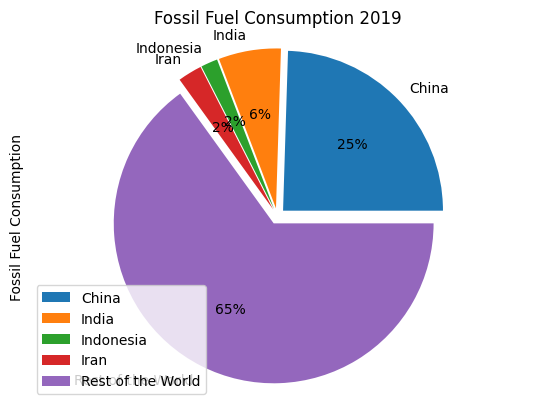

In [155]:
#importing matplotlib module
import matplotlib.pyplot as plt

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Plotting the pie chart for above dataframe
df.groupby(['country']).sum().plot(kind='pie', y='Fossil Fuel Consumption',autopct='%1.0f%%',title='Fossil Fuel Consumption 2019', explode = explode)

plt.axis('equal')
plt.show()

Top renewables 2019

In [156]:
# filter dataframe
Top_Renewables = ['China','United States','India','Turkey','Brazil', 'World']
Top_Renewables_Cons = Energy_consumption_by_country_year.loc[Energy_consumption_by_country_year['country'].isin(Top_Renewables)]
World_cons = Energy_consumption_by_country_year[Energy_consumption_by_country_year['country'] == 'World']

#Filter to 2019
Top_Renewables_Cons2019 = Top_Renewables_Cons[Top_Renewables_Cons['year'].str.contains("2019")] 
display(Top_Renewables_Cons2019)

,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
2234,Brazil,2019,270.924,182.244,1854.374,358.095,988.747,1591.027,40.028,1314.036,139.298,3445.401,1550.999,13.774,138.255
3465,China,2019,27.583,22687.462,33512.486,3073.339,3143.991,5848.439,863.457,7751.686,254.629,39360.925,4984.982,554.178,1004.602
7327,India,2019,1.295,5172.223,8612.962,596.809,400.770,848.021,111.833,2843.931,62.774,9460.984,736.188,114.569,156.780
15799,Turkey,2019,0.000,471.240,1467.992,432.201,220.778,333.035,0.000,564.551,31.474,1802.849,333.035,27.039,53.744
16369,United States,2019,406.191,3150.181,21891.102,8466.457,671.447,4400.254,2109.762,10274.464,193.987,26291.355,2290.491,268.320,750.547
17024,World,2019,1101.949,43849.215,136761.607,39292.468,10455.127,25427.562,6923.412,53619.925,1614.027,162194.290,18504.151,1792.996,3540.051


In [157]:
# Add Top renewables  and subtract World
df = pd.DataFrame({
    'country': ['China', 'India', 'Turkey', 'United States', 'Brazil', 'Rest of the World'],
    'Renewables Consumption': [4984.982	, 736.188,333.035 , 2290.491,1550.999, 8608.465]})

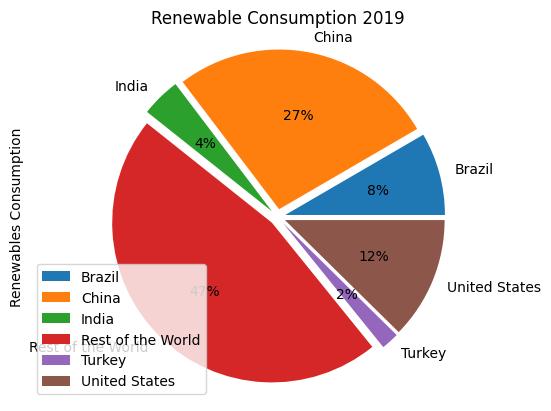

In [158]:
#importing matplotlib module
import matplotlib.pyplot as plt

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

# Plotting the pie chart for above dataframe
df.groupby(['country']).sum().plot(kind='pie', y='Renewables Consumption',autopct='%1.0f%%',title='Renewable Consumption 2019', explode = explode)

plt.axis('equal')
plt.show()
plt.show()

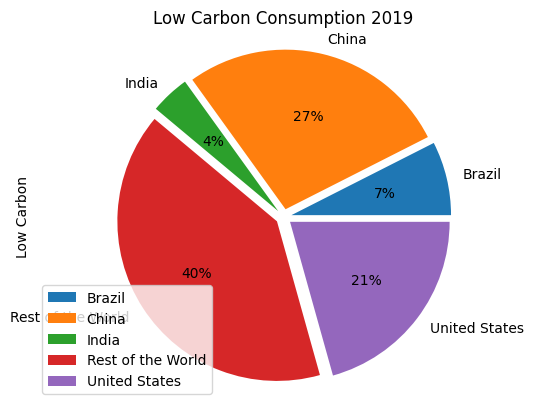

In [80]:
# Add Top Low Carbon  and subtract World
df = pd.DataFrame({
    'country': ['China', 'United States', 'Brazil', 'India', 'Rest of the World'],
    'Low Carbon': [5848.439	, 4400.254, 1591.027, 848.021,  8608.465]})

#importing matplotlib module
import matplotlib.pyplot as plt

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Plotting the pie chart for above dataframe
df.groupby(['country']).sum().plot(kind='pie', y='Low Carbon',autopct='%1.0f%%',title='Low Carbon Consumption 2019', explode = explode)

plt.axis('equal')
plt.show()
plt.show()

In [81]:
display(Top_Fossil_Cons2019)
display(Top_Renewables_Cons2019)

,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
3465,China,2019,27.583,22687.462,33512.486,3073.339,3143.991,5848.439,863.457,7751.686,254.629,39360.925,4984.982,554.178,1004.602
7327,India,2019,1.295,5172.223,8612.962,596.809,400.770,848.021,111.833,2843.931,62.774,9460.984,736.188,114.569,156.780
7448,Indonesia,2019,69.168,946.172,2324.602,438.174,42.077,150.750,0.000,940.256,38.882,2475.353,150.750,0.157,0.465
7568,Iran,2019,0.000,14.369,3339.902,2236.185,71.719,88.961,15.874,1089.348,0.061,3428.863,73.087,0.423,0.885
17024,World,2019,1101.949,43849.215,136761.607,39292.468,10455.127,25427.562,6923.412,53619.925,1614.027,162194.290,18504.151,1792.996,3540.051


,country,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
2234,Brazil,2019,270.924,182.244,1854.374,358.095,988.747,1591.027,40.028,1314.036,139.298,3445.401,1550.999,13.774,138.255
3465,China,2019,27.583,22687.462,33512.486,3073.339,3143.991,5848.439,863.457,7751.686,254.629,39360.925,4984.982,554.178,1004.602
7327,India,2019,1.295,5172.223,8612.962,596.809,400.770,848.021,111.833,2843.931,62.774,9460.984,736.188,114.569,156.780
15799,Turkey,2019,0.000,471.240,1467.992,432.201,220.778,333.035,0.000,564.551,31.474,1802.849,333.035,27.039,53.744
16369,United States,2019,406.191,3150.181,21891.102,8466.457,671.447,4400.254,2109.762,10274.464,193.987,26291.355,2290.491,268.320,750.547
17024,World,2019,1101.949,43849.215,136761.607,39292.468,10455.127,25427.562,6923.412,53619.925,1614.027,162194.290,18504.151,1792.996,3540.051


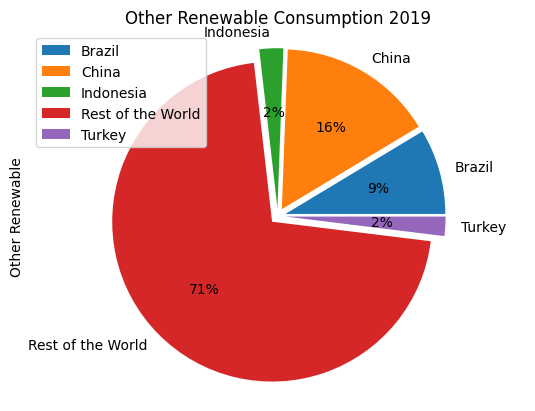

In [82]:
# Add Top Low Carbon  and subtract World
df = pd.DataFrame({
    'country': ['China', 'Brazil', 'Indonesia', 'Turkey','Rest of the World'],
    'Other Renewable': [254.629	, 139.298, 38.882, 31.474	,  1149.744]})

#importing matplotlib module
import matplotlib.pyplot as plt

# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Plotting the pie chart for above dataframe
df.groupby(['country']).sum().plot(kind='pie', y='Other Renewable',autopct='%1.0f%%',title='Other Renewable Consumption 2019', explode = explode)

plt.axis('equal')
plt.show()
plt.show()

In [83]:
Energy_consumption_by_country_year_group.drop(Energy_consumption_by_country_year_group.tail(1).index,
        inplace = True)

In [84]:
Energy_consumption_by_country_year_group.drop(Energy_consumption_by_country_year_group.head(60).index,
        inplace = True)

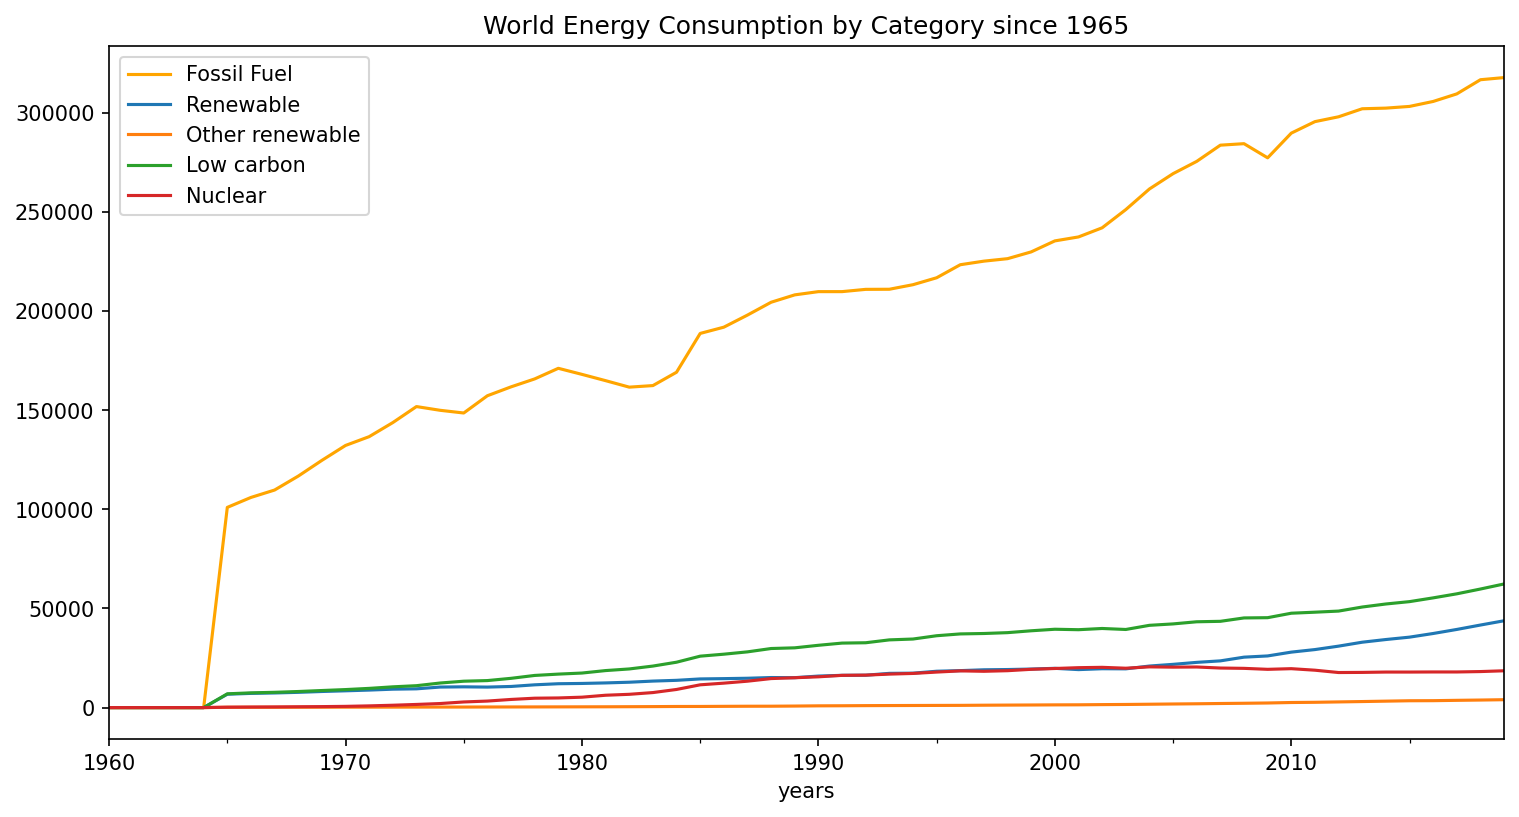

In [85]:
#importing matplotlib module
import matplotlib.pyplot as plt
plt.style.use('default')

# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(12, 6), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
Energy_consumption_by_country_year_group['fossil_fuel_consumption'].plot(label='Fossil Fuel', color='orange')
Energy_consumption_by_country_year_group['renewables_consumption'].plot(label='Renewable')
Energy_consumption_by_country_year_group['other_renewable_consumption'].plot(label='Other renewable')
Energy_consumption_by_country_year_group['low_carbon_consumption'].plot(label='Low carbon')
Energy_consumption_by_country_year_group['nuclear_consumption'].plot(label='Nuclear')


# adding title to the plot
plt.title('World Energy Consumption by Category since 1965')
  
# adding Label to the x-axis
plt.xlabel('years')
  
# adding legend to the curve
plt.legend()


###Linear regressions
Lessons learned
X value cannot be an indexed column
Int needed for regression

In [96]:
Energy_consumption_by_country_year_group_lr=Energy_consumption_by_country_year.groupby(['year']).sum().reset_index()
Energy_consumption_by_country_year_group_lr.drop(Energy_consumption_by_country_year_group.tail(1).index,
        inplace = True)


In [99]:
Energy_consumption_by_country_year_group_lr.drop(Energy_consumption_by_country_year_group_lr.head(65).index,
        inplace = True)

In [108]:
Energy_consumption_by_country_year_group_lr.head()

,year,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,primary_energy_consumption,renewables_consumption,solar_consumption,wind_consumption
66,1966,0.0,48972.322,105982.207,20606.398,6998.546,7432.819,273.790,58489.417,160.487,136747.787,7159.031,0.0,0.0
67,1967,0.0,48182.466,109715.909,22122.135,7211.871,7701.710,327.238,62671.745,162.599,141895.538,7374.473,0.0,0.0
68,1968,0.0,48903.479,116740.254,24133.015,7511.748,8105.567,413.870,68026.396,179.952,150539.181,7691.698,0.0,0.0
69,1969,0.0,50396.246,124677.986,26500.275,7925.992,8604.718,489.378,73730.652,189.350,160714.529,8115.340,0.0,0.0
70,1970,0.0,51175.862,132200.328,28844.401,8254.715,9078.629,616.301,80124.196,207.614,170839.371,8462.329,0.0,0.0


In [110]:
# convert the cost column data type (float) into integer
Energy_consumption_by_country_year_group_lr = Energy_consumption_by_country_year_group_lr.astype(int)

# display data types
print(Energy_consumption_by_country_year_group_lr.dtypes)

0
year                           int64
biofuel_consumption            int64
coal_consumption               int64
fossil_fuel_consumption        int64
gas_consumption                int64
hydro_consumption              int64
low_carbon_consumption         int64
nuclear_consumption            int64
oil_consumption                int64
other_renewable_consumption    int64
primary_energy_consumption     int64
renewables_consumption         int64
solar_consumption              int64
wind_consumption               int64
dtype: object


Linear regression fossil fuels

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


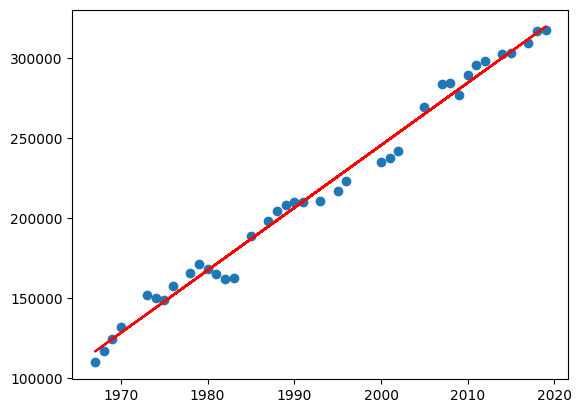

In [111]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
# Using pairplot we'll visualize the data for correlation
#sns.pairplot(df_china_energy_consumption, x_vars=['year'], 
#             y_vars='fossil_fuel_consumption', size=4, aspect=1, kind='scatter')
#plt.show()

# Creating X and y
X = Energy_consumption_by_country_year_group_lr['year']
y = Energy_consumption_by_country_year_group_lr['fossil_fuel_consumption']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train
y_train


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm.astype(int)).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

# Visualizing the regression line
# MUST view the lr.summary() to get the values to put in the plot below!!!!!
plt.scatter(X_train, y_train)
plt.plot(X_train, -7.571e+06 + 3908.26513*X_train, 'r')
plt.show()

Linear regression Renewable energy 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


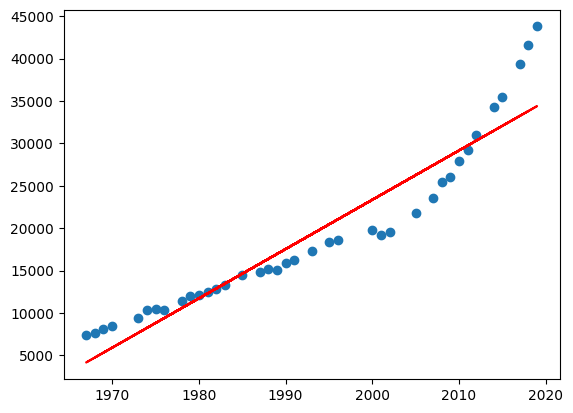

In [120]:
# Using pairplot we'll visualize the data for correlation
#sns.pairplot(df_china_energy_consumption, x_vars=['year'], 
#             y_vars='fossil_fuel_consumption', size=4, aspect=1, kind='scatter')
#plt.show()

# Creating X and y
X = Energy_consumption_by_country_year_group_lr['year']
y = Energy_consumption_by_country_year_group_lr['renewables_consumption']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train
y_train


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm.astype(int)).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

# Visualizing the regression line
# MUST view the lr.summary() to get the values to put in the plot below!!!!!
plt.scatter(X_train, y_train)
plt.plot(X_train, 	-1.139e+06 + 581.1781*X_train, 'r')
plt.show()

Linear regression other Renewables

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


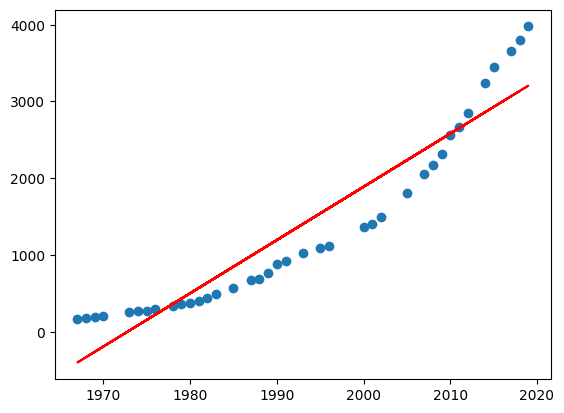

In [122]:
#Other renewables linear regression
# Using pairplot we'll visualize the data for correlation
#sns.pairplot(df_china_energy_consumption, x_vars=['year'], 
#             y_vars='fossil_fuel_consumption', size=4, aspect=1, kind='scatter')
#plt.show()

# Creating X and y
X = Energy_consumption_by_country_year_group_lr['year']
y = Energy_consumption_by_country_year_group_lr['other_renewable_consumption']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train
y_train


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm.astype(int)).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

# Visualizing the regression line
# MUST view the lr.summary() to get the values to put in the plot below!!!!!
plt.scatter(X_train, y_train)
plt.plot(X_train, 	-1.368e+05 + 69.3443*X_train, 'r')
plt.show()

Linear regression Low carbon

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


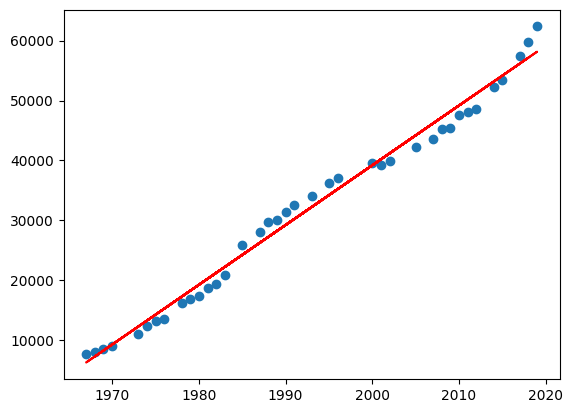

In [124]:
#Other renewables linear regression
# Using pairplot we'll visualize the data for correlation
#sns.pairplot(df_china_energy_consumption, x_vars=['year'], 
#             y_vars='fossil_fuel_consumption', size=4, aspect=1, kind='scatter')
#plt.show()

# Creating X and y
X = Energy_consumption_by_country_year_group_lr['year']
y = Energy_consumption_by_country_year_group_lr['low_carbon_consumption']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train
y_train


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm.astype(int)).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

# Visualizing the regression line
# MUST view the lr.summary() to get the values to put in the plot below!!!!!
plt.scatter(X_train, y_train)
plt.plot(X_train, 	-1.954e+06 + 996.6028*X_train, 'r')
plt.show()

Linear regression nuclear

In [127]:
#Other renewables linear regression
# Using pairplot we'll visualize the data for correlation
#sns.pairplot(df_china_energy_consumption, x_vars=['year'], 
#             y_vars='fossil_fuel_consumption', size=4, aspect=1, kind='scatter')
#plt.show()

# Creating X and y
X = Energy_consumption_by_country_year_group_lr['year']
y = Energy_consumption_by_country_year_group_lr['nuclear_consumption']

# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

# Take a look at the train dataset
X_train
y_train


# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm.astype(int)).fit()

# Printing the parameters
lr.params


# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

# Visualizing the regression line
# MUST view the lr.summary() to get the values to put in the plot below!!!!!
#plt.scatter(X_train, y_train)
#plt.plot(X_train, 	-8.153e+05 + 415.4243*X_train, 'r')
#plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     nuclear_consumption   R-squared:                       0.820
Model:                             OLS   Adj. R-squared:                  0.815
Method:                  Least Squares   F-statistic:                     163.7
Date:                 Fri, 21 Oct 2022   Prob (F-statistic):           5.87e-15
Time:                         15:29:30   Log-Likelihood:                -359.53
No. Observations:                   38   AIC:                             723.1
Df Residuals:                       36   BIC:                             726.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.153e+05   6.47e+04    -12.601      0.000   -9.47e+05   -6.84e+05
year         415.4243     32.470     12.794      0.000     349.572     481.276
==============================================================================
Omnibus:                       15.856   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.355
Skew:                           0.229   Prob(JB):                        0.187
Kurtosis:                       1.618   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""